In [1]:
import nltk
import random
import numpy as np
from itertools import repeat
from sklearn.model_selection import train_test_split
from nltk.corpus import names
from sklearn import tree 


In [2]:
#nltk.download('all')

In [3]:
# confirm male and female txt files exist
names.fileids()

['female.txt', 'male.txt']

In [4]:
names

<WordListCorpusReader in '/Users/dilipganesan/nltk_data/corpora/names'>

In [5]:
# load male and female  name files from nltk.names; store in people list
males = [n for n in names.words('male.txt')] 
females = [n for n in names.words('female.txt')] 
people = males + females

# make gender list
gender = list(repeat('male',len(males))) + \
list(repeat('female',len(females)))

In [6]:
# extract features
def gender_features(word):
    features = {}
    #features['first_last'] = word[0] + word[-1].lower()
    #features['first_two'] = word[0:2]
    features['last'] = word[-1].lower()
    features['last_two'] = word[-2:].lower()

    return(features)


gender_features('Shrek')

{'last': 'k', 'last_two': 'ek'}

In [7]:
 #len(features)

In [8]:
#featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
#train_set1, test_set1 = featuresets[500:], featuresets[:500]


In [9]:
# split into test and train, with test file containing 1000 samples
people_train, people_test, gender_train, gender_test =  \
train_test_split(people, gender, test_size=1000, random_state=4)

# split test into two separate components of 500 each: test and devtest
people_test, people_devtest, gender_test, gender_devtest = \
train_test_split(people_test, gender_test, test_size=500, random_state=4)

# list of tuples, gender features, gender
train_set = list(zip(map(gender_features, people_train),gender_train))
devtest_set = list(zip(map(gender_features, people_devtest),gender_devtest))
test_set = list(zip(map(gender_features, people_test),gender_test))


# list of tuples, names, gender
train_names = list(zip(people_train,gender_train))
devtest_names = list(zip(people_devtest,gender_devtest))
test_names = list(zip(people_test, gender_test))

In [10]:

classifier = nltk.DecisionTreeClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)



0.794

In [11]:
 # look at names that were mis-classified
errors = []
for (name, tag) in devtest_names:
    #print(name)
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

print('actual, guess, name: \n')
for x in errors:
    print(x)

actual, guess, name: 

('male', 'female', 'Abbie')
('male', 'female', 'Clayborne')
('male', 'female', 'Reese')
('male', 'female', 'Randi')
('male', 'female', 'Aguste')
('male', 'female', 'Lucien')
('male', 'female', 'Jeffry')
('male', 'female', 'Davide')
('male', 'female', 'Parry')
('male', 'female', 'Damien')
('female', 'male', 'Karin')
('female', 'male', 'Marillin')
('female', 'male', 'Sibby')
('male', 'female', 'Clarance')
('male', 'female', 'Percival')
('male', 'female', 'Kennedy')
('male', 'female', 'Westbrook')
('female', 'male', 'Kim')
('male', 'female', 'Arel')
('female', 'male', 'Lamb')
('male', 'female', 'Morly')
('male', 'female', 'Lane')
('male', 'female', 'Casey')
('male', 'female', 'Tremayne')
('female', 'male', 'Ruthy')
('male', 'female', 'Michele')
('female', 'male', 'Joby')
('female', 'male', 'Marian')
('male', 'female', 'Kit')
('male', 'female', 'Heath')
('male', 'female', 'Darien')
('female', 'male', 'Joycelin')
('female', 'male', 'Chrysler')
('male', 'female', 'Terr

In [12]:
classifier.classify(gender_features('Neo'))

'male'

In [13]:
# Changing the Gender(Target Variable) to either 1 or 0 for Classification.
gender = [gen.replace('male', '1') for gen in gender]
gender = [gen.replace('female', '0') for gen in gender]

In [14]:
#gender

In [15]:
from sklearn import tree
import io

In [16]:
#Splitting the dataset to test and train.
X_train, X_test, Y_train, Y_test =  \
train_test_split(people, gender, test_size=0.2, random_state=38)

In [17]:
#Transforming the X_train string, so it can used in the classifier
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i,_ in enumerate(X_train):
        X_train[i] = le.fit_transform([i])

In [19]:
# Decision free Claissifier Fitting.
dtree=tree.DecisionTreeClassifier()
clf = dtree.fit(X_train,Y_train)

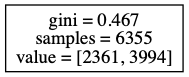

In [24]:
#Decision Tree Graph.
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = io.StringIO()
tree.export_graphviz(clf, out_file=dot_data)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())